# Mall Customer Segmentation Using K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [62]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv(f'D:\Yash_Projects\Mall_Customers.csv')

In [63]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [65]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Removing CustomerId column

Since this feature has no impact on beaviour of customers, we can discard this column

In [66]:
customer_data.drop('CustomerID',axis=1,inplace=True)
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [67]:
customer_data['Gender'].replace(['Female','Male'], [0,1],inplace=True)

We have replaced Female with zero and Male with one to make the data ready for our clustering model to use.

In [52]:
# checking for missing values
customer_data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

If any of the sum is non zero we can remove null values or replace null values with mean depending on amount of null data.

# EDA with Data Visualizations

EDA is a process of performing initial investigations on data so as to draw raw conclusions, discover patterns and spot outliers. We check hypothesis etc using visualization tools.

Data visualization is the graphical representaion of data which helps us to get better insight by plotting all the data collectively.

We will now try to get better insight of data using matplotlib and seaborn library.

# Counting the number of Males and Females

<AxesSubplot:xlabel='Gender', ylabel='count'>

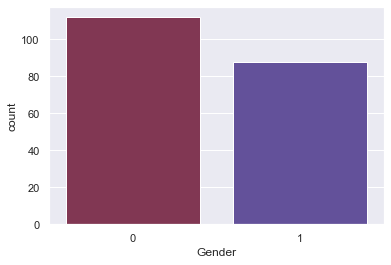

In [30]:
sns.countplot(x='Gender',data=customer_data,palette="twilight_r")

It can be clearly seen that there are more females customer as compared to male customers i.e. around 85 males and more than 100 females.

<AxesSubplot:>

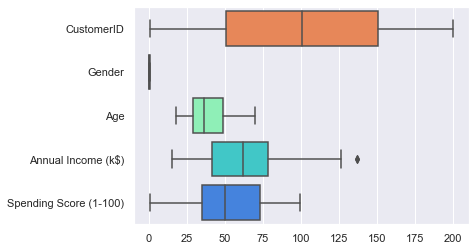

In [32]:
sns.boxplot(data=customer_data,orient='h',palette='rainbow_r')

1. It can be reported that an outlier exists in "ANNUAL INCOME" feature.
2. Average age of customers lies between 30 and 40.
3. Average spending score of customers is almost 50.
4. Average annual income is 60k$

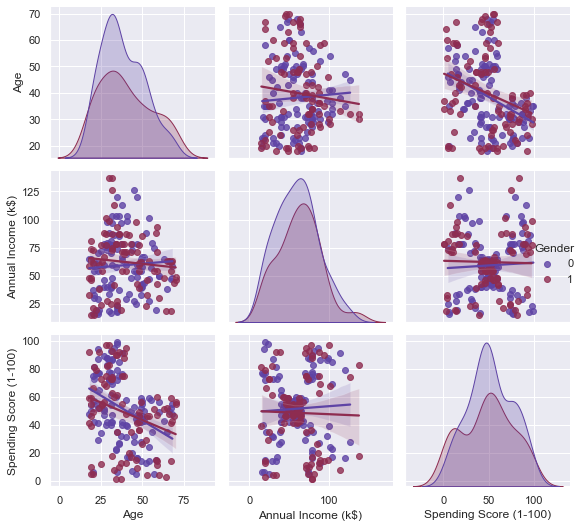

In [70]:
sns.pairplot(customer_data,  kind ="reg", hue = "Gender", palette="twilight")
plt.tight_layout()

The above pairplot graphic gives relation between different features while making a difference between genders. It can be seen that there is a relation between age, annual income, and spending score. We will visualize this more clearly in next scetions.

# Age VS Spending score

The below plot indicates that spending score is decreasing with age. Spending score is higher with age between 20 to 40

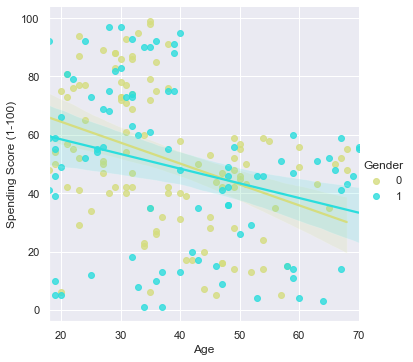

In [77]:
sns.lmplot(x = "Age", y = "Spending Score (1-100)", data = customer_data, hue = "Gender",palette="rainbow_r")

# Annual Income VS Spending score

The plot between annual income and spending score indicates that:

Spending score is saturated at 40 to 60 for values of income between 40 to 70.
There is no significant difference between male and female spendings.

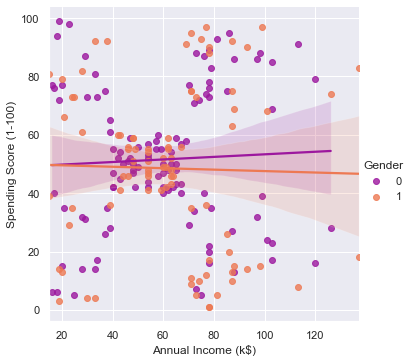

In [85]:
sns.lmplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", data = customer_data, hue = "Gender",palette="plasma")

# Annual Income VS Age

The following plot indicates that:

Anuual income is fair enough for people between ages 30 to 40

Choosing the Annual Income Column & Spending Score column

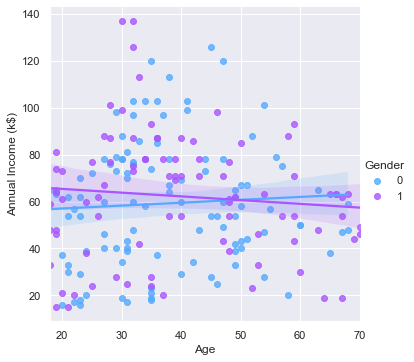

In [81]:
sns.lmplot(y = "Annual Income (k$)", x = "Age", data = customer_data, hue = "Gender",palette="cool")

In [13]:
X = customer_data.iloc[:,[3,4]].values

In [14]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [16]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

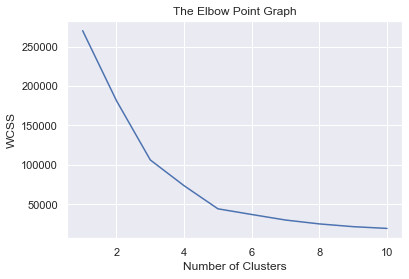

In [17]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [19]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 0 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 4 2 0 2 4 2 4 2 0 2 4 2 4 2 4 2 4 2 0 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

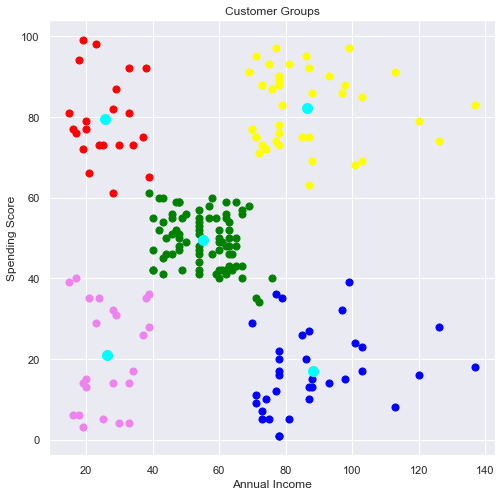

In [86]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()